# 研究計画

### 深層学習による特徴表現
`AlexNet[6]` 
`bvlc_reference_caffenet[7]`
`DeepMatch`

### 評価基準（特徴点評価repeatability、特徴マッチング評価Recall,Precision)
`射影変形行列`
`repeatability`
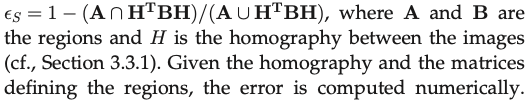
`Recall`
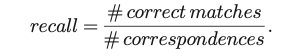
`Precision`
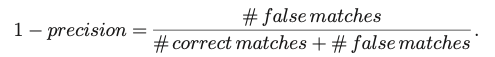
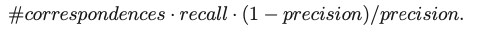
`>>>>>>>>>`
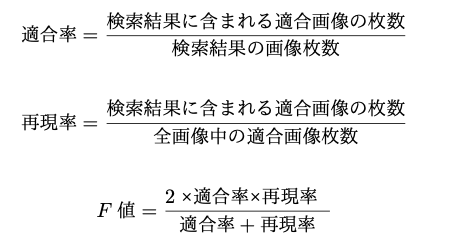


In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time,math

def ORBexp(direc, imgname1, num):
    orb = cv2.ORB_create()
    img1 = cv2.imread(direc+imgname1+".png")
    imgname2 = imgname1+str(num)
    img2 = cv2.imread(direc+imgname2+".png")
    kp1, des1 = orb.detectAndCompute(img1,None) #des是描述子
    kp2, des2 = orb.detectAndCompute(img2,None)

    # BFMatcher解决匹配
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
    
    #计算matches的平均距离
    matches = bf.match(des1,des2)
    dist_matches = [m.distance for m in matches]
    print(">> matches: %d matching points, Average distance is "% (len(dist_matches))+str(np.mean(dist_matches)))

    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(img_RANSAC, cv2.COLOR_BGR2RGB))
    plt.show()
    
    knnmatches = bf.knnMatch(des1,des2, k=2)

    # 调整ratio
    good = []
    for m,n in knnmatches:
        if m.distance < 0.5*n.distance:
            good.append(m)

    # 通过特征点坐标计算单应性矩阵H
    # （findHomography中使用了RANSAC算法剔初错误匹配）
    if len(good) > 1:
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
        H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        matchesMask = mask.ravel().tolist()

#         h,w = img1.shape[:2]
#         pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
#         dst = cv2.perspectiveTransform(pts,H)
#         img2_sqr = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

        # 匹配画图
        img_RANSAC = cv2.drawMatches(img1,kp1,img2,kp2,good,None,matchesMask=matchesMask,flags = 2)

        #输出RANSAC之前，RANSAC之后匹配点数
        print(">> KnnMatches: "+imgname2)
        #计算RANSAC之前平均距离
        dist = [m.distance for m in good]    
        print("   Before RANSAC: %d matching points, Average distance is " % (len(good))+str(np.mean(dist)))
        #计算RANSAC之后平均距离
        dist_ransac=[]
        for m in range(len(good)):
            dist_ransac.append(dist[m]*matchesMask[m])
        print("   After  RANSAC: %d matching points, Average distance is " % (np.count_nonzero(matchesMask))+str(np.mean(dist_ransac)))
        plt.imshow(cv2.cvtColor(imgRANSAC, cv2.COLOR_BGR2RGB))
        plt.show()
    else:
        img_out = cv2.drawMatches(img1,kp1,img2,kp2,good,None)
        print(">> KnnMatches: "+imgname2)
        print("   Before RANSAC: 0 matching points, Average distance is 10000")
        print("   After  RANSAC: 0 matching points, Average distance is 10000")
        plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
        plt.show()

In [14]:
direc = "../Database/Else/PLAZA/"
imgname = "PLAZA"

for num in range(15,195,15):
    ORBexp(direc, imgname, num)

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-tnokoph3/opencv/modules/core/src/batch_distance.cpp:275: error: (-215:Assertion failed) type == src2.type() && src1.cols == src2.cols && (type == CV_32F || type == CV_8U) in function 'batchDistance'
